In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 741 images belonging to 71 classes.
Class names: ['ABDULLAH AL SHAHRIAR', 'AHMED IMTIAZ', 'AL-NAFI', 'ARNAB BISHAKH SARKER', 'ASHA ISLAM', 'ASHIK AHAMED', 'BISHANATH TARAFDER', 'BORSHON ALFRED GOMES', 'ELMA ISLAM', 'ESM-E MOULA CHOWDHURY ABHA', 'FAHIM RAHMAN', 'FAIZA BINTE ZAMAN', 'IMAM HASAN JAMI', 'KHANDAKER AZNAN ALAM SEAM', 'MAHASHETAB HASSAN', 'MAHBUBUL ISLAM ABDULLAH', 'MAHFUZUR RAHMAN FERDOUS', 'MAHNAZ HOSSAIN', 'MD ABID HASAN RAPPY', 'MD ABU ZAYED KHAN', 'MD ASRAFUL KABIR SOHAN', 'MD ATIK ULLAH KHAN', 'MD FARDIN AMIN RIYAD', 'MD IMTIAJ ALAM SAJIN', 'MD JAHID HASSAN', 'MD MUNTASIR AREFIN NAEEM', 'MD MUSFIQUR RAHMAN', 'MD NAFIZ AHMED', 'MD NAIMUR RAHMAN', 'MD NAKIB MUNSIF', 'MD NAZMUL HASSAN BHUIYAN', 'MD RIFAT SHIKDAR', 'MD SAIFUR RAHMAN SADI', 'MD SAJID ISLAM KHAN', 'MD SHANZID HASAN', 'MD TOYABUR RAHAMAN', 'MD WAHIDUZZAMAN SUVA', 'MOHAMMAD BIN AB JALIL SHEAKH', 'MOHAMMAD NUR', 'MOHAMMAD RAFIUL HAQUE', 'MOHAMMED TANVIR HASSAN', 'MOMOTAZ YEASMIN', 'MREDUL MAHMUD AKASH', 'M

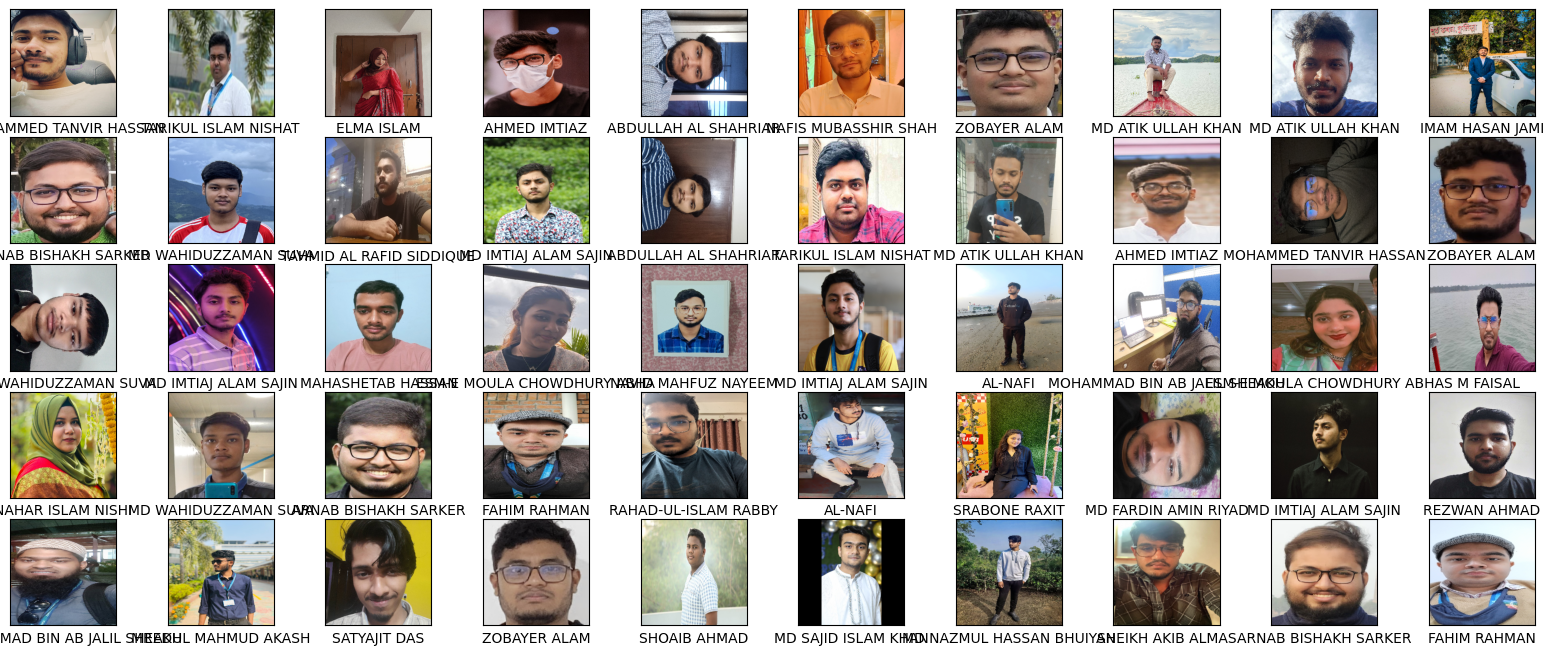

In [8]:
train_datagen = ImageDataGenerator(rescale=1/255)

dataset_path = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MachineLearningAndOpenCVProjects/FaceDetection/Imagedata-20240322T195303Z-001/Imagedata',
    target_size=(300,300),
    batch_size=50,
    class_mode='sparse'   # FIXED: use sparse for multi-class
)

# Extract one batch for visualization
images, labels = next(dataset_path)

class_names = sorted(dataset_path.class_indices.keys())
print("Class names:", class_names)

# Plot images
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[int(labels[i])])
plt.show()


In [9]:
model = Sequential([
    layers.Conv2D(32, (5,5), activation='relu', input_shape=(300,300,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 296, 296, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,017,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 71)             │         4,615 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080,135 (19.38 MB)

 Trainable params: 5,080,135 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
h = model.fit(
    dataset_path,
    epochs=20
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 459s 30s/step - accuracy: 0.0150 - loss: 4.4620
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 157s 10s/step - accuracy: 0.0563 - loss: 4.0369
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 167s 11s/step - accuracy: 0.1427 - loss: 3.6734
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 160s 10s/step - accuracy: 0.2771 - loss: 3.1658
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 160s 11s/step - accuracy: 0.4235 - loss: 2.4174
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 164s 11s/step - accuracy: 0.5805 - loss: 1.7898
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step - accuracy: 0.7597 - loss: 0.8947
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 162s 11s/step - accuracy: 0.9025 - loss: 0.4764
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 162s 11s/step - accuracy: 0.9556 - loss: 0.1649
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 172s 11s/step - accuracy: 0.9801 - loss: 0.0857
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 192s 11s/step - accuracy: 0.9882 - loss: 0.0577
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step

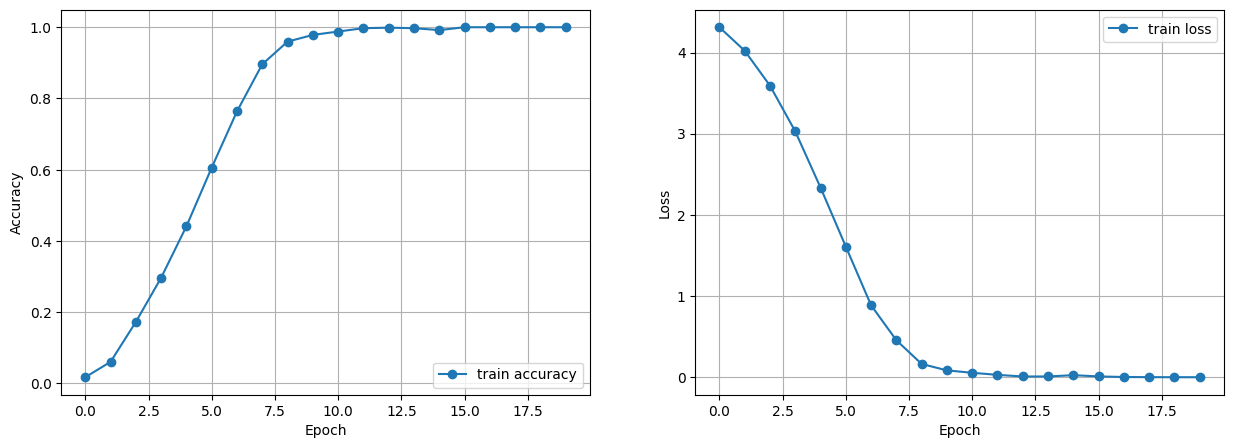

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/faceRecognition.h5')

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/faceRecognition.h5')
class_names = sorted(os.listdir('/content/drive/MyDrive/MachineLearningAndOpenCVProjects/FaceDetection/Imagedata-20240322T195303Z-001/Imagedata'))

MODEL_INPUT_SIZE = (300, 300)
IP_CAMERA_URL = "http://192.168.0.100:8080/video"
cap = cv2.VideoCapture(IP_CAMERA_URL)

if not cap.isOpened():
    print("Error: Cannot open video.")
    exit()

print("Video camera opened.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to apply frame.")
        break

    resized_frame = cv2.resize(frame, MODEL_INPUT_SIZE)
    normalized_frame = resized_frame / 255.0
    input_tensor = np.expand_dims(normalized_frame, axis=0)

    preds = model.predict(input_tensor)
    predicted_index = np.argmax(preds)
    predicted_name = class_names[predicted_index]
    confidence = preds[0][predicted_index]

    label = f"{predicted_name} ({confidence:.2f})"

    cv2.putText(frame, label, (30, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

    cv2.imshow("Face Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting")
        break

cap.release()
cv2.destroyAllWindows()



Error: Cannot open video.
Video camera opened.
Failed to apply frame.


error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
